In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank-train.csv
/kaggle/input/bank-marketing-dataset/bank-test.csv


In [5]:
import os

# Cek file dataset yang tersedia di direktori Kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing-dataset/bank-train.csv
/kaggle/input/bank-marketing-dataset/bank-test.csv


In [6]:
import pandas as pd

# Load dataset training
df_train = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank-train.csv", delimiter=";")

# Lihat 5 data pertama
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [7]:
df_train.info()  # Cek tipe data & missing values
df_train.describe()  # Statistik ringkasan data numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 5.5+ MB


,id,age,balance,day,duration,campaign,pdays,previous,y
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,20099.50000,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550,0.072400
std,11547.14972,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128,0.259152
min,100.00000,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,10099.75000,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000,0.000000
50%,20099.50000,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000,0.000000
75%,30099.25000,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000,0.000000
max,40099.00000,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000,1.000000


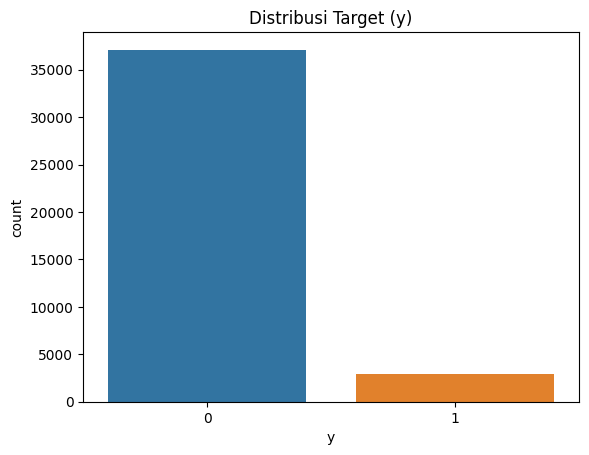

In [8]:
# Cek Distribusi Target (y)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df_train)
plt.title("Distribusi Target (y)")
plt.show()

## Preprocessing Data

In [10]:
# Ubah Target y ke Tipe object
df_train['y'] = df_train['y'].astype(str)

In [11]:
df_train.info()  # Cek tipe data & missing values
df_train.describe()  # Statistik ringkasan data numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.5+ MB


,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,20099.50000,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550
std,11547.14972,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128
min,100.00000,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,10099.75000,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,20099.50000,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,30099.25000,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000
max,40099.00000,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000


In [12]:
# Konversi Variabel Kategorikal ke Numerik (One-Hot Encoding)
df_train = pd.get_dummies(df_train, columns=['job', 'marital', 'education', 'contact', 'poutcome', 'default', 'housing', 'loan'], drop_first=True)

In [13]:
# Pisahkan Fitur (X) dan Target (y)
X_train = df_train.drop(columns=["y"])
y_train = df_train["y"]

In [16]:
print(X_train.info())  # Pastikan semua kolom numerik
print(y_train.value_counts())  # Cek distribusi target

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 14307 to 15795
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   32000 non-null  int64 
 1   age                  32000 non-null  int64 
 2   balance              32000 non-null  int64 
 3   day                  32000 non-null  int64 
 4   month                32000 non-null  object
 5   duration             32000 non-null  int64 
 6   campaign             32000 non-null  int64 
 7   pdays                32000 non-null  int64 
 8   previous             32000 non-null  int64 
 9   job_blue-collar      32000 non-null  bool  
 10  job_entrepreneur     32000 non-null  bool  
 11  job_housemaid        32000 non-null  bool  
 12  job_management       32000 non-null  bool  
 13  job_retired          32000 non-null  bool  
 14  job_self-employed    32000 non-null  bool  
 15  job_services         32000 non-null  bool  
 16  job_s

In [21]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file yang benar
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank-train.csv', delimiter=';')  # Gunakan delimiter yang sesuai

In [22]:
print(df.head())  # Lihat 5 baris pertama
print(df.info())  # Cek tipe data setiap kolom


    id  age           job  marital  education default  balance housing loan  \
0  100   58    management  married   tertiary      no     2143     yes   no   
1  101   44    technician   single  secondary      no       29     yes   no   
2  102   33  entrepreneur  married  secondary      no        2     yes  yes   
3  103   47   blue-collar  married    unknown      no     1506     yes   no   
4  104   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data column

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'])  # Pisahkan fitur (tanpa kolom target 'y')
y = df['y']  # Ambil kolom target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(X_train.shape, X_test.shape)  # Harus ada dua array dengan ukuran berbeda
print(X_train.info())  # Pastikan semua kolom ada


(32000, 17) (8000, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 14307 to 15795
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         32000 non-null  int64 
 1   age        32000 non-null  int64 
 2   job        32000 non-null  object
 3   marital    32000 non-null  object
 4   education  32000 non-null  object
 5   default    32000 non-null  object
 6   balance    32000 non-null  int64 
 7   housing    32000 non-null  object
 8   loan       32000 non-null  object
 9   contact    32000 non-null  object
 10  day        32000 non-null  int64 
 11  month      32000 non-null  object
 12  duration   32000 non-null  int64 
 13  campaign   32000 non-null  int64 
 14  pdays      32000 non-null  int64 
 15  previous   32000 non-null  int64 
 16  poutcome   32000 non-null  object
dtypes: int64(8), object(9)
memory usage: 4.4+ MB
None


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Pastikan kolom "month" ada di X_train
if 'month' in X_train.columns:
    X_train['month'] = le.fit_transform(X_train['month'])
    X_test['month'] = le.transform(X_test['month'])  # Jangan pakai fit_transform di X_test!


In [27]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Pastikan kolom "month" ada di X_train
if 'month' in X_train.columns:
    X_train['month'] = le.fit_transform(X_train['month'])
    X_test['month'] = le.transform(X_test['month'])  # Jangan pakai fit_transform di X_test!


In [31]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()

# List kolom kategorikal yang perlu dikonversi
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode setiap kolom dalam daftar
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [32]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Pastikan kolom "month" ada di X_train
if 'month' in X_train.columns:
    X_train['month'] = le.fit_transform(X_train['month'])
    X_test['month'] = le.transform(X_test['month'])  # Jangan pakai fit_transform di X_test!


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)  # Tambah iterasi jika perlu
model.fit(X_train, y_train)  # Train model


LogisticRegression(max_iter=500)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.932875
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7424
           1       0.58      0.23      0.33       576

    accuracy                           0.93      8000
   macro avg       0.76      0.61      0.65      8000
weighted avg       0.92      0.93      0.92      8000



## Prediksi pada Data Test (bank-test.csv)

In [39]:
# Baca Data Test
import pandas as pd

# Load data test
df_test = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank-test.csv", delimiter=";")  # Sesuaikan delimiter jika perlu


In [40]:
# Preprocessing (Sama seperti Data Training)
from sklearn.preprocessing import LabelEncoder

# Pastikan kolom test sesuai dengan train
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Lakukan encoding dengan LabelEncoder (gunakan encoder yang sama)
le = LabelEncoder()
for col in categorical_cols:
    df_test[col] = le.fit_transform(df_test[col])  # Jika LabelEncoder sama dengan training

# Jika sebelumnya pakai One-Hot Encoding:
# df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)


In [41]:
# Pastikan df_test memiliki kolom yang sama dengan df_train
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Tambahkan kolom yang hilang dengan nilai 0

# Urutkan kolom agar sesuai dengan training set
df_test = df_test[X_train.columns]


In [42]:
# Prediksi dengan Model Logistic Regression
y_test_pred = model.predict(df_test)

# Tambahkan hasil ke DataFrame
df_test['y_pred'] = y_test_pred


In [43]:
# Simpan hasil ke file CSV
df_test[['y_pred']].to_csv("prediksi_bank_test.csv", index=False)

print("Prediksi berhasil disimpan dalam prediksi_bank_test.csv")


Prediksi berhasil disimpan dalam prediksi_bank_test.csv


## Evaluasi Model pada Data Validasi (X_test, y_test)

In [44]:
# Hitung akurasi model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.932875


In [45]:
# Cek Classification Report (Precision, Recall, F1-Score)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7424
           1       0.58      0.23      0.33       576

    accuracy                           0.93      8000
   macro avg       0.76      0.61      0.65      8000
weighted avg       0.92      0.93      0.92      8000



## Menyeimbangkan Dataset

In [57]:
# Model  XGBoost 
from xgboost import XGBClassifier

# Inisialisasi dan latih model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_xgb = xgb_model.predict(X_test)


In [59]:
y_pred_new = (y_probs >= optimal_threshold).astype(int)


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7424
           1       0.54      0.41      0.46       576

    accuracy                           0.93      8000
   macro avg       0.75      0.69      0.71      8000
weighted avg       0.92      0.93      0.93      8000



In [63]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()

# List kolom kategorikal yang perlu dikonversi
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode setiap kolom dalam daftar
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


KeyError: 'job'

In [64]:
print(X_train.columns)  # Tampilkan daftar kolom yang tersedia


Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6',
       'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2',
       'education_1', 'education_2', 'education_3', 'default_1', 'housing_1',
       'loan_1', 'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')


In [65]:
print(list(X_train.columns))


['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'education_1', 'education_2', 'education_3', 'default_1', 'housing_1', 'loan_1', 'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'poutcome_1', 'poutcome_2', 'poutcome_3']


In [67]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank-train.csv", delimiter=';')  # Coba delimiter yang benar


In [68]:
print(categorical_cols)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [70]:
print(df.info())  # Menampilkan informasi dataset, termasuk jumlah kolom dan tipe data
print(df.head())  # Menampilkan 5 baris pertama untuk melihat apakah data terbaca dengan benar
print(df.columns)  # Menampilkan daftar nama kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 5.5+ MB
None
    id  age           job  marital  education default  b

In [71]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [72]:
print(df.info())  # Pastikan semua kolom sudah numerik
print(df.head())  # Lihat beberapa baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   40000 non-null  int64
 1   age                  40000 non-null  int64
 2   balance              40000 non-null  int64
 3   day                  40000 non-null  int64
 4   duration             40000 non-null  int64
 5   campaign             40000 non-null  int64
 6   pdays                40000 non-null  int64
 7   previous             40000 non-null  int64
 8   y                    40000 non-null  int64
 9   job_blue-collar      40000 non-null  bool 
 10  job_entrepreneur     40000 non-null  bool 
 11  job_housemaid        40000 non-null  bool 
 12  job_management       40000 non-null  bool 
 13  job_retired          40000 non-null  bool 
 14  job_self-employed    40000 non-null  bool 
 15  job_services         40000 non-null  bool 
 16  job_student          4

In [73]:
X = df.drop(columns=['id', 'y'])  # Hapus ID & target dari fitur
y = df['y']  # Simpan target


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.936875
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7424
           1       0.63      0.30      0.41       576

    accuracy                           0.94      8000
   macro avg       0.79      0.64      0.69      8000
weighted avg       0.92      0.94      0.93      8000



In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## XGBoost

In [79]:
!pip install xgboost


In [80]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Buat model XGBoost
model_xgb = xgb.XGBClassifier(
    objective="binary:logistic",  # Untuk klasifikasi biner
    eval_metric="logloss",  # Evaluasi menggunakan log loss
    use_label_encoder=False,
    scale_pos_weight=10,  # Penyesuaian untuk menangani ketidakseimbangan kelas
    random_state=42
)

# Latih model
model_xgb.fit(X_train, y_train)

# Prediksi
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.914375
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      7424
           1       0.45      0.78      0.57       576

    accuracy                           0.91      8000
   macro avg       0.71      0.85      0.76      8000
weighted avg       0.94      0.91      0.92      8000

